In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Random numbers from uniform distribution

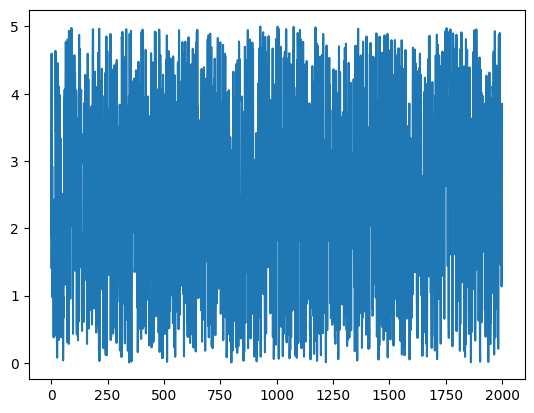

In [7]:
from numpy.random import uniform
x=uniform(0,5,2000) # generated 2000 numbers
plt.plot(x)

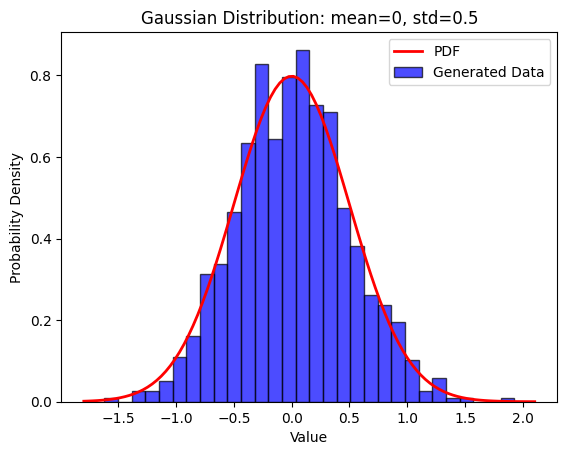

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate 1000 random numbers from a Gaussian distribution with mean 0 and std 0.5
x = np.random.normal(0, 0.5, 1000)

# Plot the histogram of the generated numbers
plt.hist(x, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')

# Plot the probability density function (PDF) of the distribution
xmin, xmax = plt.xlim()
x_range = np.linspace(xmin, xmax, 100)
pdf = (1/(0.5 * np.sqrt(2 * np.pi))) * np.exp(-(x_range - 0)**2 / (2 * 0.5**2))
plt.plot(x_range, pdf, color='red', linewidth=2)

# Add labels and title
plt.title('Gaussian Distribution: mean=0, std=0.5')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend(['PDF', 'Generated Data'])

# Show the plot
plt.show()


## Autocorrelation

The autocorrelation function is defined as $c_{k}$=$\frac{1}{n}$ $\sum_{i=1}^{k}(x_{i}-x_{avg})(x_{i+k}-x_{avg})$

(-0.025, 0.025)

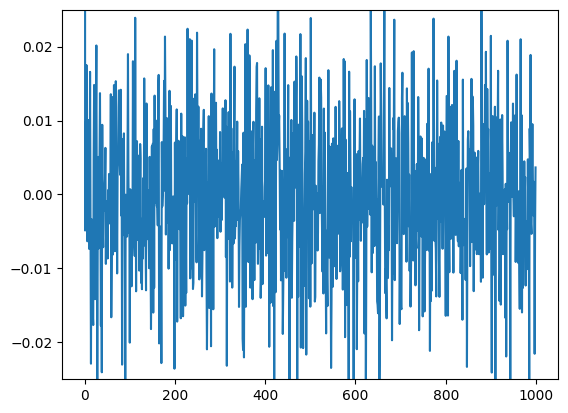

In [17]:
from numpy.random import uniform 
n=10000
x=uniform(0,1,n)
x_avg=np.mean(x)
c=lambda k: np.mean([(x[i]-x_avg)*(x[i+k]-x_avg) for i in range (n-k)])
r=lambda k: c(k)/c(0)
corr=[r(k) for k in range (1000)]
plt.plot(corr)
plt.ylim(-0.025,0.025)

https://mathworld.wolfram.com/Box-MullerTransformation.html
A transformation which transforms from a two-dimensional continuous uniform distribution to a two-dimensional bivariate normal distribution (or complex normal distribution). If $x_{1}$ and $x_{2}$ are uniformly and independently distributed between 0 and 1, then $z_{1}$ and $z_{2}$ as defined below have a normal distribution with mean $\mu = 0$ and variance $\sigma^{2}=1$

\begin{align}
z_1 &= \sqrt{-2\ln x_1}\cos(2\pi x_2) \label{eq:z1} \\
z_2 &= \sqrt{-2\ln x_1}\sin(2\pi x_2) \label{eq:z2}
\end{align}

This can be verified by solving for \( x_1 \) and \( x_2 \),

\begin{align}
x_1 &= e^{-(z_1^2+z_2^2)/2} \label{eq:x1} \\
x_2 &= \frac{1}{2\pi}\tan^{-1}\left(\frac{z_2}{z_1}\right) \label{eq:x2}
\end{align}

Taking the Jacobian yields

\begin{align}
\frac{\partial(x_1,x_2)}{\partial(z_1,z_2)} &= \begin{vmatrix}
\frac{\partial x_1}{\partial z_1} & \frac{\partial x_1}{\partial z_2} \\
\frac{\partial x_2}{\partial z_1} & \frac{\partial x_2}{\partial z_2}
\end{vmatrix} \nonumber \\
&= -\left[\frac{1}{\sqrt{2\pi}}e^{-z_1^2/2}\right]\left[\frac{1}{\sqrt{2\pi}}e^{-z_2^2/2}\right] \label{eq:jacobian}
\end{align}


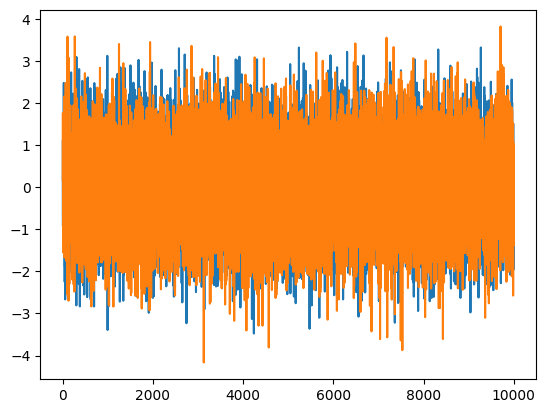

In [19]:
N=10000
x_1=np.random.random(n)
x_2=np.random.random(n)
r=np.sqrt(-2*np.log(x_1))
theta=2*np.pi*x_2
z1=r*np.cos(theta)
z2=r*np.sin(theta)
plt.plot(z1)
plt.plot(z2)

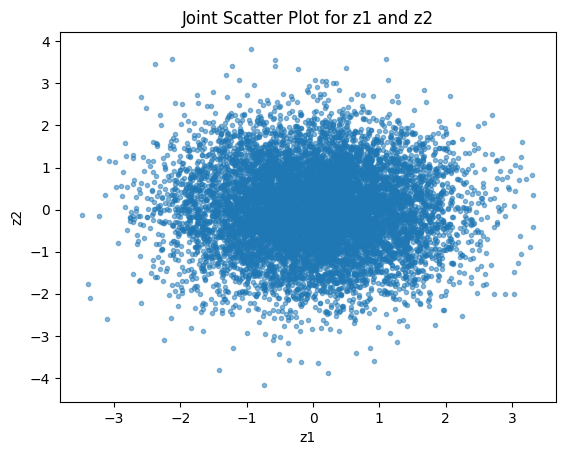

In [20]:
# Create a joint scatter plot
plt.scatter(z1, z2, alpha=0.5, marker='.')
plt.title('Joint Scatter Plot for z1 and z2')
plt.xlabel('z1')
plt.ylabel('z2')
plt.show()

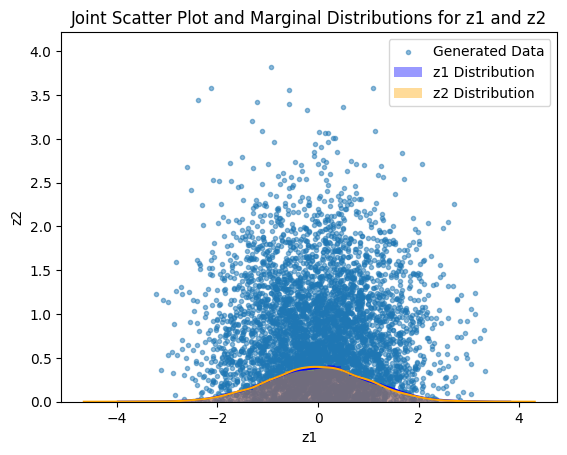

In [24]:
# Create a joint scatter plot
import seaborn as sns
# Create a joint scatter plot
plt.scatter(z1, z2, alpha=0.5, marker='.', label='Generated Data')

# Plot the marginal distributions (normal distribution)
sns.distplot(z1, color='blue', label='z1 Distribution')
sns.distplot(z2, color='orange', label='z2 Distribution')

plt.title('Joint Scatter Plot and Marginal Distributions for z1 and z2')
plt.xlabel('z1')
plt.ylabel('z2')
plt.legend()
plt.show()

<AxesSubplot:>

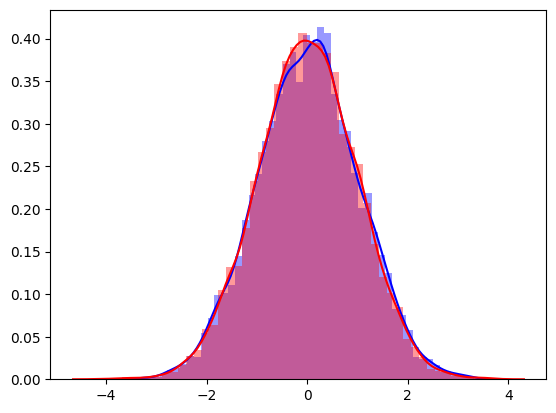

In [26]:
sns.distplot(z1, color='blue', label='z1 Distribution')
sns.distplot(z2, color='red', label='z2 Distribution')